In [1]:
import pandas as pd                 
import numpy as np                   
import matplotlib.pyplot as plt      
import seaborn as sns                
import scipy.stats as stats  

import mysql.connector

In [3]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [19]:
# Connect to MySQL database
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Goodmorning@2024",
    database="mysql"
)

# Create a cursor object
cur = conn.cursor()

# Execute the SQL query
cur.execute("SELECT * FROM analysis.`machine downtime`")

# Fetch all rows from the cursor
rows = cur.fetchall()

# Print the rows
for row in rows:
    print(row)

# Close the cursor and connection
cur.close()
conn.close()

('31-12-2021', 'Makino-L1-Unit1-2013', 'Shopfloor-L1', 71.04, 6.933724915, 6.284964506, 25.6, 46.0, 33.4, 1.291, 26.492, 25892, 335, 24.05532601, 3.58, 'Machine_Failure')
('31-12-2021', 'Makino-L1-Unit1-2013', 'Shopfloor-L1', 125.33, 4.936891865, 6.19673253, 35.3, 47.4, 34.6, 1.382, 25.274, 19856, 368, 14.20288973, 2.68, 'Machine_Failure')
('31-12-2021', 'Makino-L3-Unit1-2015', 'Shopfloor-L3', 71.12, 6.839413159, 6.655448451, 13.1, 40.7, 33.0, 1.319, 30.608, 19851, 325, 24.04926704, 3.55, 'Machine_Failure')
('31-05-2022', 'Makino-L2-Unit1-2015', 'Shopfloor-L2', 139.34, 4.574382007, 6.560393963, 24.4, 44.2, 40.6, 0.618, 30.791, 18461, 360, 25.86002925, 3.55, 'Machine_Failure')
('31-03-2022', 'Makino-L1-Unit1-2013', 'Shopfloor-L1', 60.51, 6.893181921, 6.141237748, 4.1, 47.3, 31.4, 0.983, 25.516, 26526, 354, 25.51587386, 3.55, 'Machine_Failure')
('31-03-2022', 'Makino-L2-Unit1-2015', 'Shopfloor-L2', 137.37, 5.918357337, 7.228066182, 5.4, 48.0, 32.7, 0.903, 25.597, 27613, 319, 25.52133005,

In [20]:
# Get the column names from the cursor description
columns = [desc[0] for desc in cur.description]

# Create a DataFrame from the fetched data
df = pd.DataFrame(rows, columns=columns)

# Close the cursor and connection
cur.close()
conn.close()

In [21]:
df.head()

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure,Coolant_Pressure,Air_System_Pressure,Coolant_Temperature,Hydraulic_Oil_Temperature,Spindle_Bearing_Temperature,Spindle_Vibration,Tool_Vibration,Spindle_Speed,Voltage,Torque,Cutting,Downtime
0,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892,335,24.055326,3.58,Machine_Failure
1,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856,368,14.202890,2.68,Machine_Failure
2,31-12-2021,Makino-L3-Unit1-2015,Shopfloor-L3,71.12,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851,325,24.049267,3.55,Machine_Failure
3,31-05-2022,Makino-L2-Unit1-2015,Shopfloor-L2,139.34,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461,360,25.860029,3.55,Machine_Failure
4,31-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,60.51,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526,354,25.515874,3.55,Machine_Failure


In [22]:
# save the file as csv for future reference
df.to_csv('output.csv', index=False)

In [23]:
# import the csv file as 'md'(machine_downtime)
md = pd.read_csv('output.csv')

Data Understanding

In [24]:
md.head()

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure,Coolant_Pressure,Air_System_Pressure,Coolant_Temperature,Hydraulic_Oil_Temperature,Spindle_Bearing_Temperature,Spindle_Vibration,Tool_Vibration,Spindle_Speed,Voltage,Torque,Cutting,Downtime
0,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892,335,24.055326,3.58,Machine_Failure
1,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856,368,14.202890,2.68,Machine_Failure
2,31-12-2021,Makino-L3-Unit1-2015,Shopfloor-L3,71.12,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851,325,24.049267,3.55,Machine_Failure
3,31-05-2022,Makino-L2-Unit1-2015,Shopfloor-L2,139.34,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461,360,25.860029,3.55,Machine_Failure
4,31-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,60.51,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526,354,25.515874,3.55,Machine_Failure


In [25]:
md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         2381 non-null   object 
 1   Machine_ID                   2381 non-null   object 
 2   Assembly_Line_No             2381 non-null   object 
 3   Hydraulic_Pressure           2381 non-null   float64
 4   Coolant_Pressure             2381 non-null   float64
 5   Air_System_Pressure          2381 non-null   float64
 6   Coolant_Temperature          2381 non-null   float64
 7   Hydraulic_Oil_Temperature    2381 non-null   float64
 8   Spindle_Bearing_Temperature  2381 non-null   float64
 9   Spindle_Vibration            2381 non-null   float64
 10  Tool_Vibration               2381 non-null   float64
 11  Spindle_Speed                2381 non-null   int64  
 12  Voltage                      2381 non-null   int64  
 13  Torque            

In [27]:
md.shape

(2381, 16)

In [28]:
md.dtypes

Date                            object
Machine_ID                      object
Assembly_Line_No                object
Hydraulic_Pressure             float64
Coolant_Pressure               float64
Air_System_Pressure            float64
Coolant_Temperature            float64
Hydraulic_Oil_Temperature      float64
Spindle_Bearing_Temperature    float64
Spindle_Vibration              float64
Tool_Vibration                 float64
Spindle_Speed                    int64
Voltage                          int64
Torque                         float64
Cutting                        float64
Downtime                        object
dtype: object

In [29]:
md.columns

Index(['Date', 'Machine_ID', 'Assembly_Line_No', 'Hydraulic_Pressure',
       'Coolant_Pressure', 'Air_System_Pressure', 'Coolant_Temperature',
       'Hydraulic_Oil_Temperature', 'Spindle_Bearing_Temperature',
       'Spindle_Vibration', 'Tool_Vibration', 'Spindle_Speed', 'Voltage',
       'Torque', 'Cutting', 'Downtime'],
      dtype='object')

In [30]:
# checking null values
null_values = md.isnull()
null_count = null_values.sum()
print(null_count)

Date                           0
Machine_ID                     0
Assembly_Line_No               0
Hydraulic_Pressure             0
Coolant_Pressure               0
Air_System_Pressure            0
Coolant_Temperature            0
Hydraulic_Oil_Temperature      0
Spindle_Bearing_Temperature    0
Spindle_Vibration              0
Tool_Vibration                 0
Spindle_Speed                  0
Voltage                        0
Torque                         0
Cutting                        0
Downtime                       0
dtype: int64


In [31]:
md.describe()

,Hydraulic_Pressure,Coolant_Pressure,Air_System_Pressure,Coolant_Temperature,Hydraulic_Oil_Temperature,Spindle_Bearing_Temperature,Spindle_Vibration,Tool_Vibration,Spindle_Speed,Voltage,Torque,Cutting
count,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000
mean,101.184167,4.955532,6.499094,18.518774,47.616422,35.064763,1.007646,25.415098,20271.568249,349.101638,25.196960,2.785586
std,30.323683,1.000772,0.406355,8.360034,3.757603,3.764735,0.341260,6.455127,3853.673196,45.277313,6.151921,0.615749
min,-14.326454,0.325000,5.063480,4.100000,35.200000,22.600000,-0.461000,3.469000,0.000000,202.000000,0.000000,1.800000
25%,76.220000,4.470511,6.218482,10.500000,45.100000,32.500000,0.777000,21.056000,17919.000000,319.000000,21.653830,2.270000
50%,96.165147,4.940503,6.505191,21.100000,47.700000,35.100000,1.007000,25.437000,20126.000000,349.000000,24.633746,2.770000
75%,126.302016,5.526438,6.780411,25.600000,50.100000,37.600000,1.233000,29.826000,22492.000000,380.000000,30.514008,3.270000
max,191.000000,11.350000,7.973992,36.500000,61.400000,49.500000,2.000000,45.726000,27957.000000,479.000000,55.552400,3.930000


Data Cleaning

In [35]:
# Fill null values with constant value
#df.fillna(value = 0, inplace=True)

# Fill null values with mean of the column
md.fillna(md.median(numeric_only = True), inplace =True)

# Interpolate null values 
#df.interpolate(inplace = True)

In [33]:
# Convert date column 'datetime' format
md['Date']= pd.to_datetime(md['Date'])


#verify the date  column
print(md.dtypes['Date'])

datetime64[ns]


C:\Users\Shamim\AppData\Local\Temp\ipykernel_5036\3522889603.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  md['Date']= pd.to_datetime(md['Date'])


In [37]:
# Convert 'Downtime' column to Categorical
md['Downtime'] = md['Downtime'].astype('category')

# verify the data type
print(md.dtypes['Downtime'])

category


In [38]:
#Verify if any null values exist
md.isna().sum()

Date                           0
Machine_ID                     0
Assembly_Line_No               0
Hydraulic_Pressure             0
Coolant_Pressure               0
Air_System_Pressure            0
Coolant_Temperature            0
Hydraulic_Oil_Temperature      0
Spindle_Bearing_Temperature    0
Spindle_Vibration              0
Tool_Vibration                 0
Spindle_Speed                  0
Voltage                        0
Torque                         0
Cutting                        0
Downtime                       0
dtype: int64

In [39]:
# Checking for duplicate values if any
md.duplicated().sum()

0

Measures of Central Tendency

In [40]:
# Mode for 'Downtime ' coulmn which is categorical data type
mode_value =md[['Downtime']].mode()
print(mode_value)

          Downtime
0  Machine_Failure


In [41]:
md.describe()

,Date,Hydraulic_Pressure,Coolant_Pressure,Air_System_Pressure,Coolant_Temperature,Hydraulic_Oil_Temperature,Spindle_Bearing_Temperature,Spindle_Vibration,Tool_Vibration,Spindle_Speed,Voltage,Torque,Cutting
count,2381,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000
mean,2022-03-13 12:00:54.430911488,101.184167,4.955532,6.499094,18.518774,47.616422,35.064763,1.007646,25.415098,20271.568249,349.101638,25.196960,2.785586
min,2021-11-24 00:00:00,-14.326454,0.325000,5.063480,4.100000,35.200000,22.600000,-0.461000,3.469000,0.000000,202.000000,0.000000,1.800000
25%,2022-02-22 00:00:00,76.220000,4.470511,6.218482,10.500000,45.100000,32.500000,0.777000,21.056000,17919.000000,319.000000,21.653830,2.270000
50%,2022-03-14 00:00:00,96.165147,4.940503,6.505191,21.100000,47.700000,35.100000,1.007000,25.437000,20126.000000,349.000000,24.633746,2.770000
75%,2022-04-02 00:00:00,126.302016,5.526438,6.780411,25.600000,50.100000,37.600000,1.233000,29.826000,22492.000000,380.000000,30.514008,3.270000
max,2022-06-19 00:00:00,191.000000,11.350000,7.973992,36.500000,61.400000,49.500000,2.000000,45.726000,27957.000000,479.000000,55.552400,3.930000
std,NaN,30.323683,1.000772,0.406355,8.360034,3.757603,3.764735,0.341260,6.455127,3853.673196,45.277313,6.151921,0.615749


Measures of Dispersion

In [44]:
# Select the columns for dispersion calculation
columns_to_analyze = ['Hydraulic_Pressure', 'Coolant_Pressure', 'Air_System_Pressure', 'Coolant_Temperature', 
                      'Hydraulic_Oil_Temperature', 'Spindle_Bearing_Temperature', 'Spindle_Vibration', 'Tool_Vibration', 
                      'Spindle_Speed', 'Voltage', 'Torque', 'Cutting']

# Calculate measures of dispersion for the columns
dispersion_measures = pd.DataFrame({
    'min': md[columns_to_analyze].min(),
    'max': md[columns_to_analyze].max(),
    'std': md[columns_to_analyze].std(),
    'var': md[columns_to_analyze].var(),
    'range': md[columns_to_analyze].max() - md[columns_to_analyze].min()
})

# Print the dispersion measures
print(dispersion_measures)

                                    min           max          std  \
Hydraulic_Pressure           -14.326454    191.000000    30.323683   
Coolant_Pressure               0.325000     11.350000     1.000772   
Air_System_Pressure            5.063480      7.973992     0.406355   
Coolant_Temperature            4.100000     36.500000     8.360034   
Hydraulic_Oil_Temperature     35.200000     61.400000     3.757603   
Spindle_Bearing_Temperature   22.600000     49.500000     3.764735   
Spindle_Vibration             -0.461000      2.000000     0.341260   
Tool_Vibration                 3.469000     45.726000     6.455127   
Spindle_Speed                  0.000000  27957.000000  3853.673196   
Voltage                      202.000000    479.000000    45.277313   
Torque                         0.000000     55.552400     6.151921   
Cutting                        1.800000      3.930000     0.615749   

                                      var         range  
Hydraulic_Pressure           9.

Outlier Detection

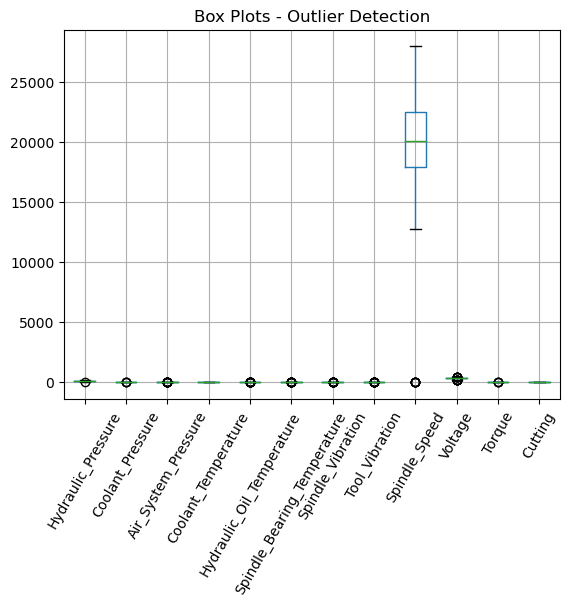

In [46]:
# Select the columns for outlier detection
columns_to_analyze = ['Hydraulic_Pressure', 'Coolant_Pressure', 'Air_System_Pressure',
                      'Coolant_Temperature', 'Hydraulic_Oil_Temperature', 'Spindle_Bearing_Temperature',
                      'Spindle_Vibration', 'Tool_Vibration', 'Spindle_Speed', 'Voltage', 'Torque', 'Cutting']

# Create box plots for outlier detection
md[columns_to_analyze].boxplot()
plt.xticks(rotation=60)
plt.title('Box Plots - Outlier Detection')
plt.show()

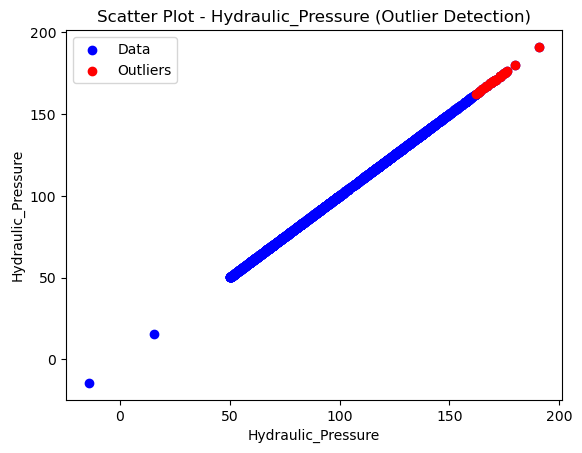

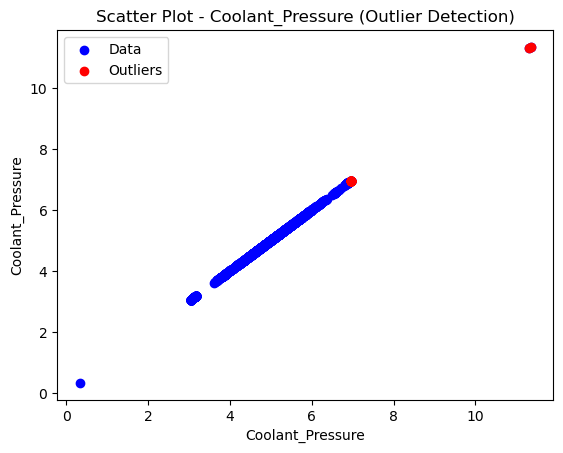

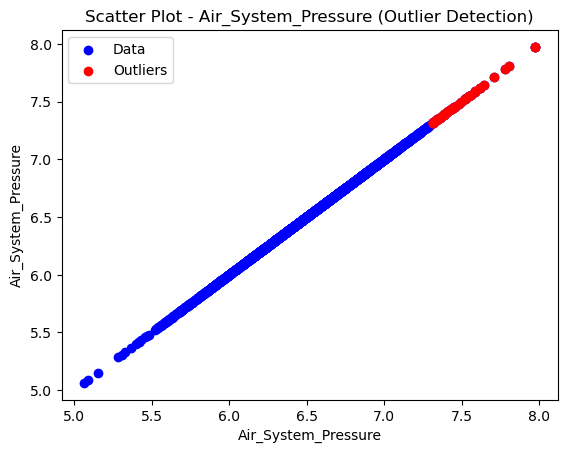

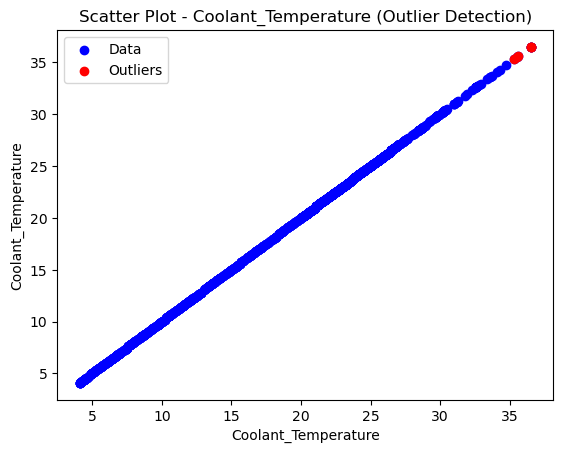

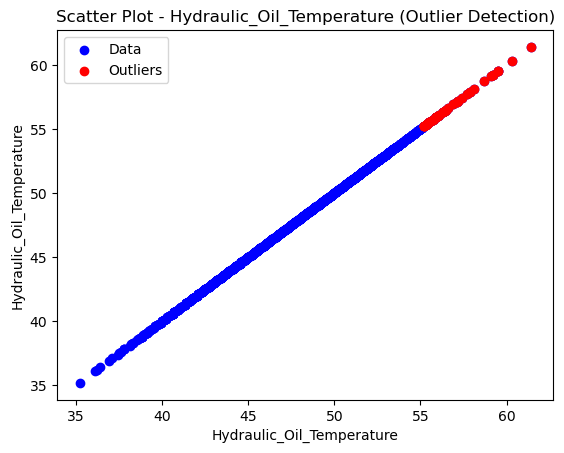

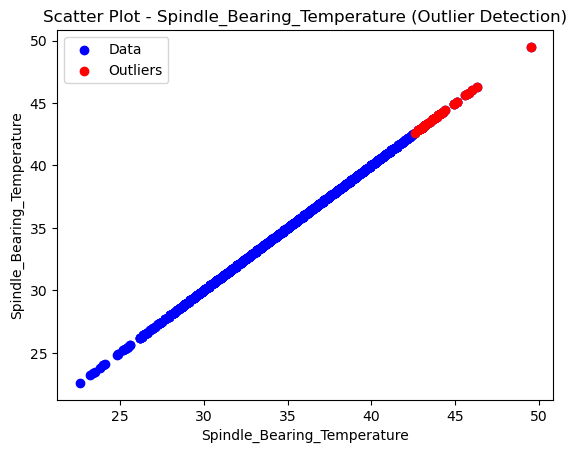

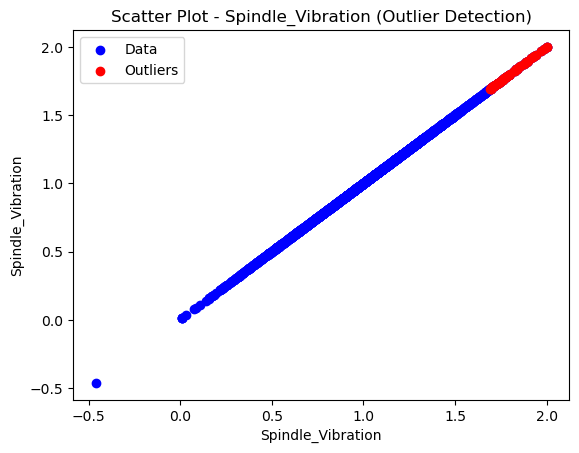

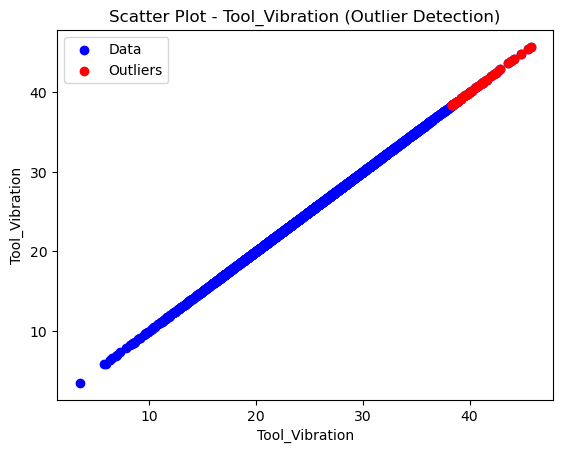

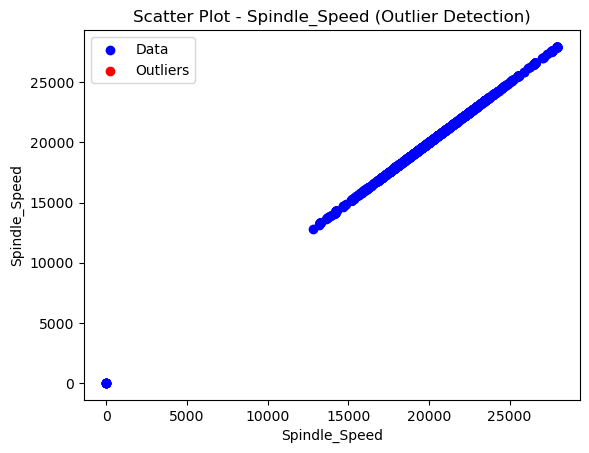

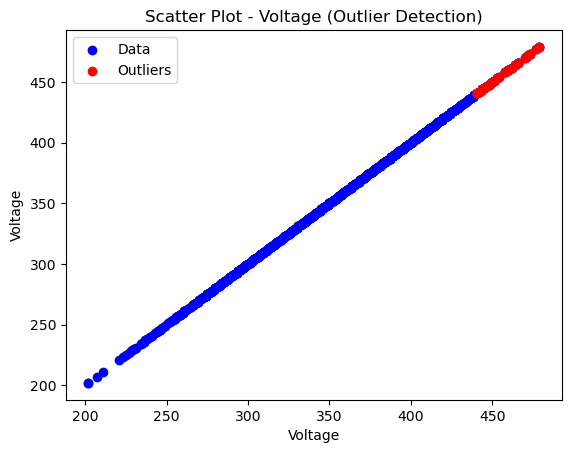

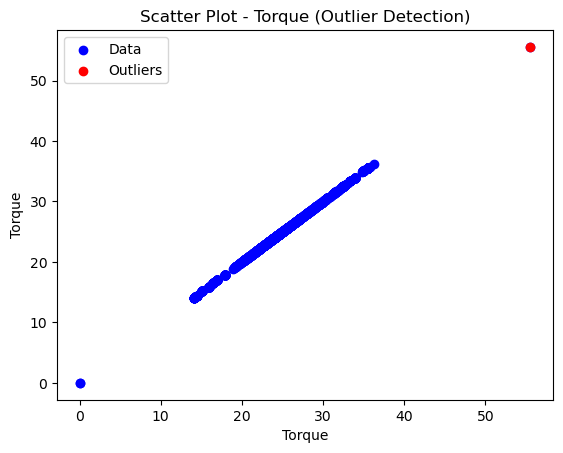

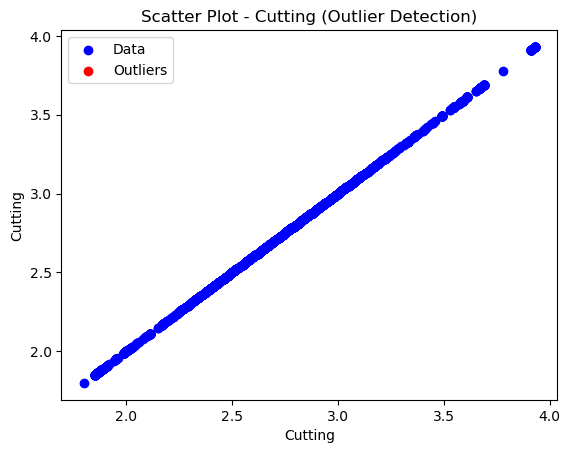

In [47]:
# Set the matplotlib backend to display inline
%matplotlib inline

# Create scatter plots for outlier detection
for column in columns_to_analyze:
    plt.scatter(md[column], md[column], c='blue', label='Data')
    
    # Identify outliers and change their color to red
    outliers = md[column].loc[md[column] > md[column].mean() + 2 * md[column].std()]
    plt.scatter(outliers, outliers, c='red', label='Outliers')
    
    plt.xlabel(column)
    plt.ylabel(column)
    plt.title(f'Scatter Plot - {column} (Outlier Detection)')
    plt.legend()
    plt.show()

Correlation of Variables

In [48]:
column_corr = md.corr(numeric_only = True)
print("Correlation of Columns :")
print(column_corr)

Correlation of Columns :
                             Hydraulic_Pressure  Coolant_Pressure  \
Hydraulic_Pressure                     1.000000         -0.077766   
Coolant_Pressure                      -0.077766          1.000000   
Air_System_Pressure                   -0.024273         -0.032078   
Coolant_Temperature                   -0.115034         -0.001019   
Hydraulic_Oil_Temperature              0.008767          0.001117   
Spindle_Bearing_Temperature            0.029467         -0.006760   
Spindle_Vibration                     -0.010100         -0.002337   
Tool_Vibration                         0.020431         -0.002037   
Spindle_Speed                         -0.119692          0.082582   
Voltage                                0.001924          0.040335   
Torque                                 0.161497         -0.101952   
Cutting                               -0.217178          0.172778   

                             Air_System_Pressure  Coolant_Temperature  \
Hydr

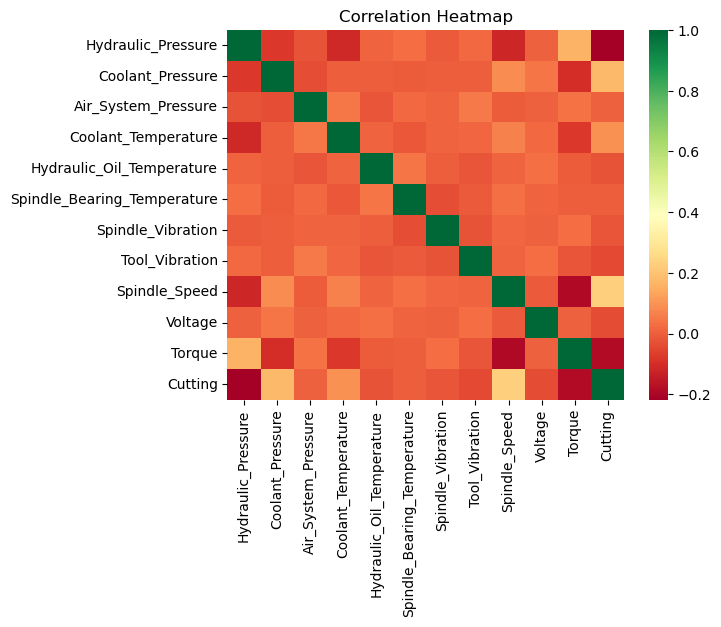

In [49]:
#Set the matplotlib backend to display inline
%matplotlib inline

# Create the heatmap with color scheme
sns.heatmap(column_corr, cmap='RdYlGn', xticklabels=column_corr.columns, yticklabels=column_corr.columns)
plt.title('Correlation Heatmap')
plt.show()

Skewness

In [50]:
skewness=md.skew(numeric_only=True)
print(skewness)

Hydraulic_Pressure             0.206051
Coolant_Pressure               0.157474
Air_System_Pressure           -0.056341
Coolant_Temperature           -0.220429
Hydraulic_Oil_Temperature      0.006579
Spindle_Bearing_Temperature   -0.057013
Spindle_Vibration             -0.011111
Tool_Vibration                -0.051378
Spindle_Speed                 -0.186988
Voltage                       -0.035090
Torque                         0.031834
Cutting                        0.121152
dtype: float64


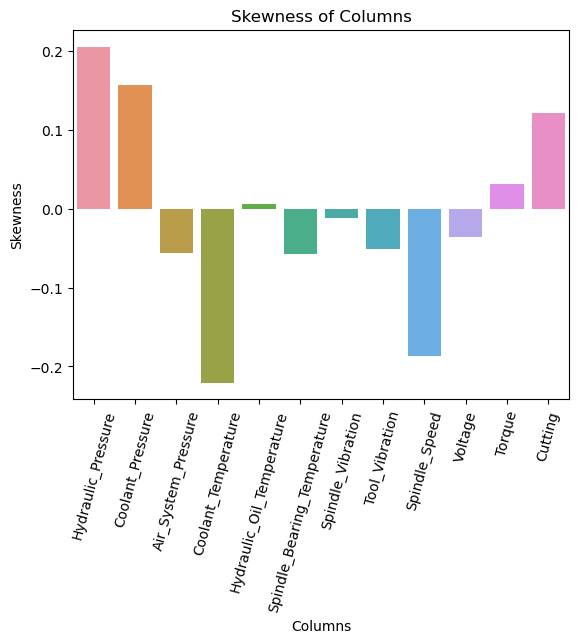

In [51]:
%matplotlib inline

# Create a bar plot of skewness
sns.barplot(x=skewness.index, y=skewness.values)
plt.xticks(rotation=75)
plt.xlabel('Columns')
plt.ylabel('Skewness')
plt.title('Skewness of Columns')
plt.show()

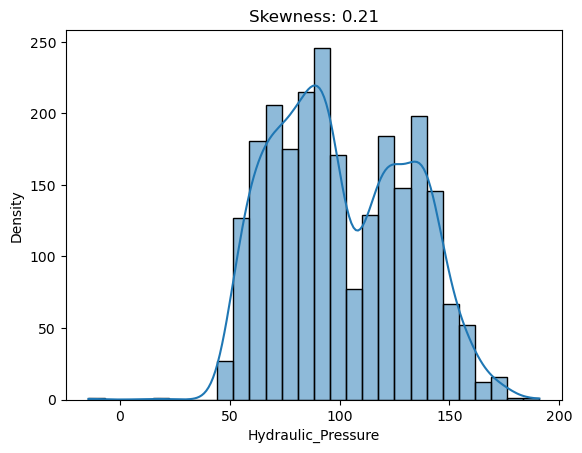

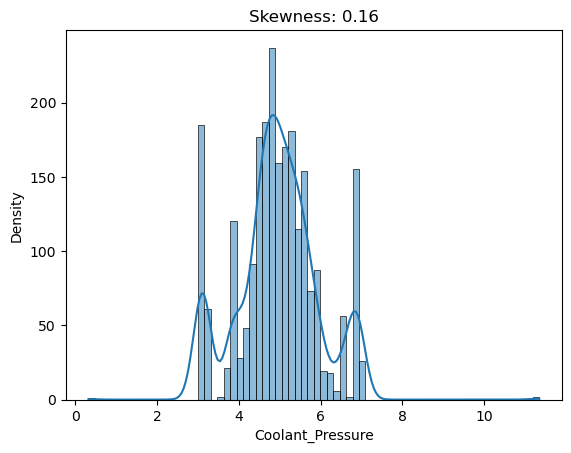

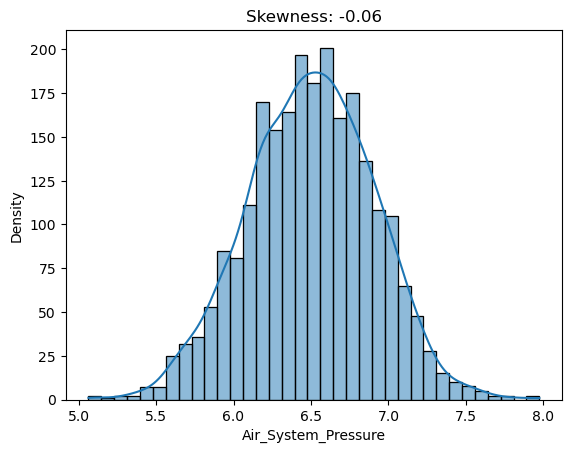

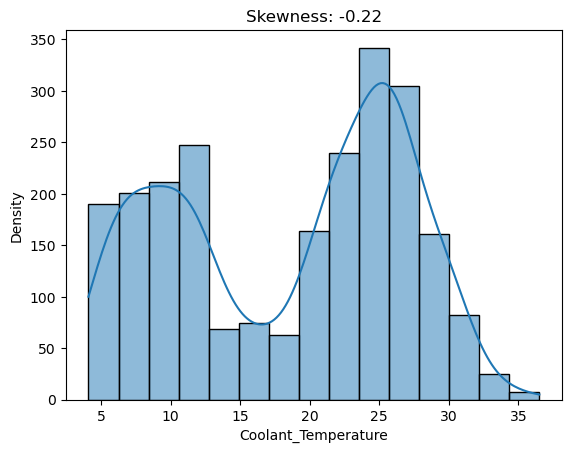

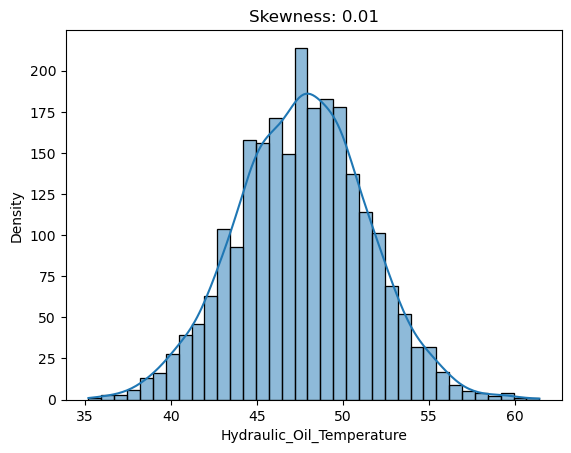

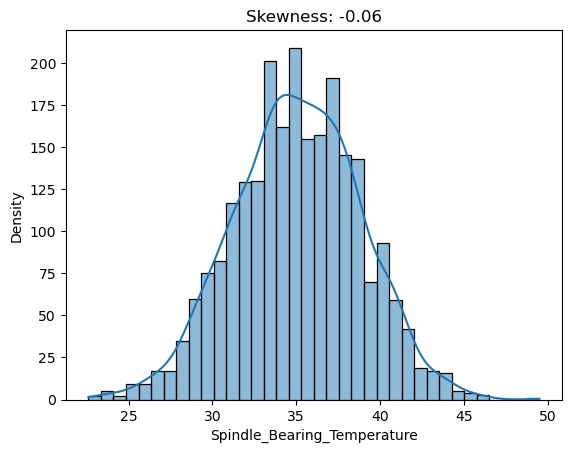

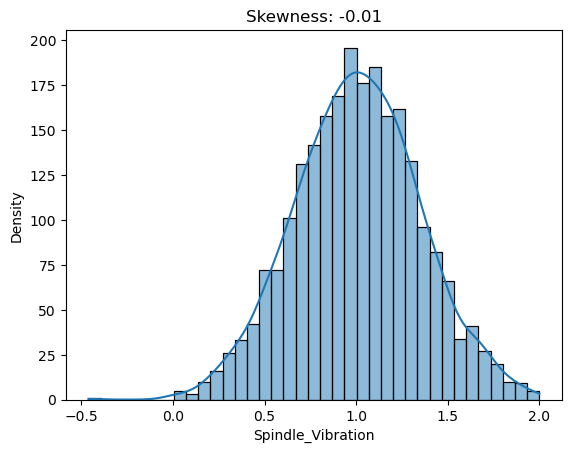

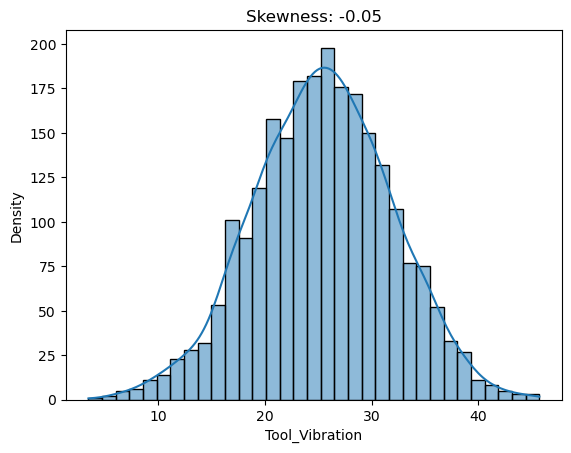

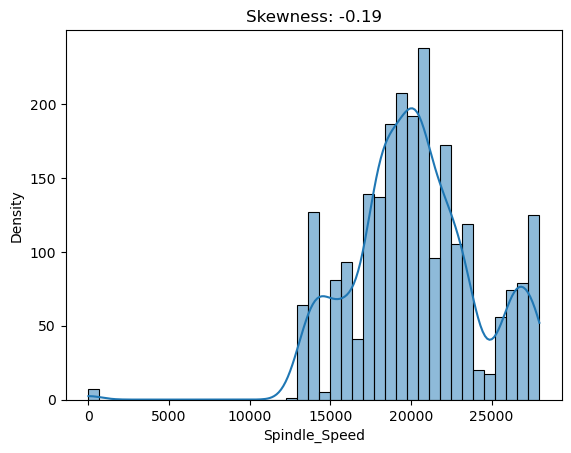

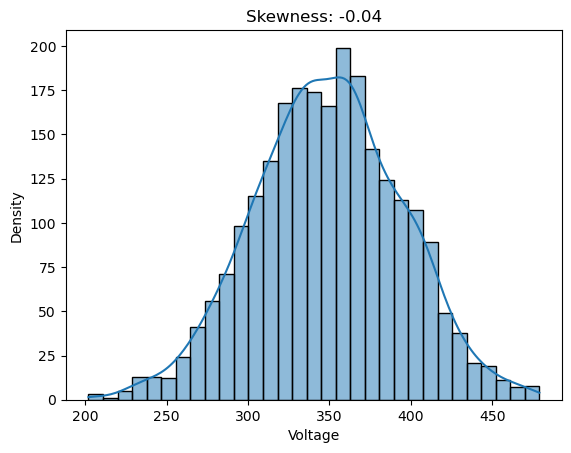

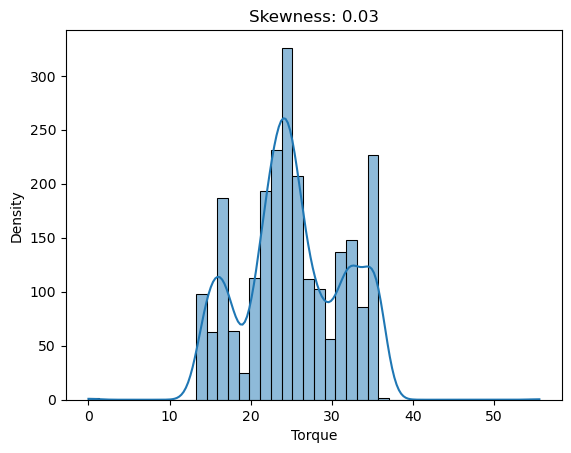

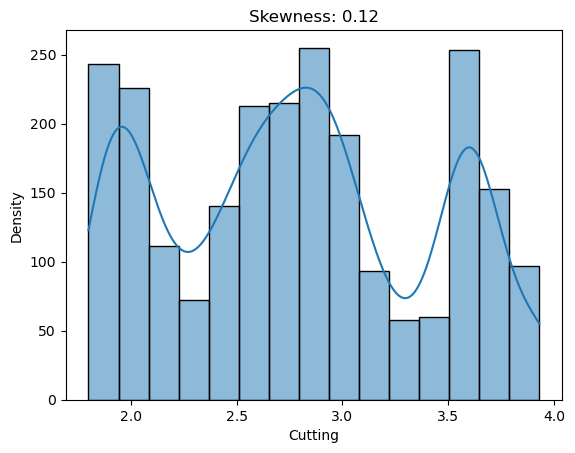

In [52]:
for column in columns_to_analyze:
  plt.figure()
  sns.histplot(data=md, x=column, kde=True)
  plt.xlabel(column)
  plt.ylabel('Density')
  plt.title(f'Skewness: {skewness[column]:.2f}')
  plt.show()

Kurtosis

In [53]:
# Calculate the kurtosis for each column
kurtosis_values = md.kurtosis(numeric_only = True)
print(kurtosis_values)

Hydraulic_Pressure            -0.911985
Coolant_Pressure               1.195076
Air_System_Pressure            0.006653
Coolant_Temperature           -1.360550
Hydraulic_Oil_Temperature      0.051123
Spindle_Bearing_Temperature   -0.041116
Spindle_Vibration             -0.010686
Tool_Vibration                -0.047534
Spindle_Speed                  1.431685
Voltage                       -0.082821
Torque                        -0.444638
Cutting                       -1.080048
dtype: float64


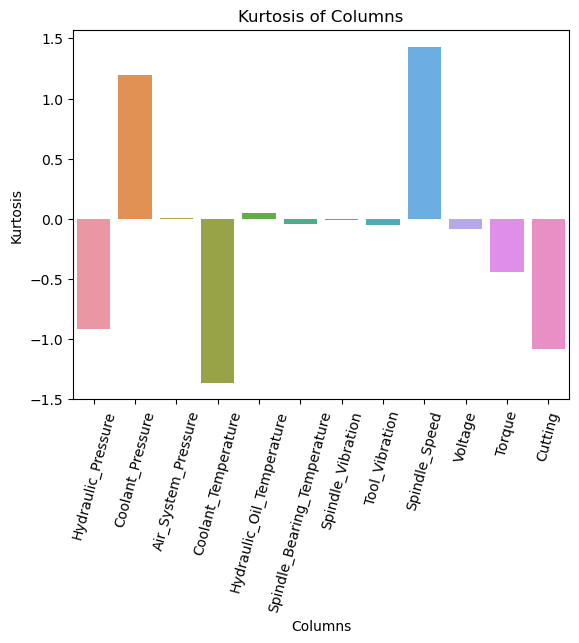

In [54]:
%matplotlib inline

# Create a bar plot of kurtosis
sns.barplot(x=kurtosis_values.index, y=kurtosis_values.values)
plt.xticks(rotation=75)
plt.xlabel('Columns')
plt.ylabel('Kurtosis')
plt.title('Kurtosis of Columns')
plt.show()

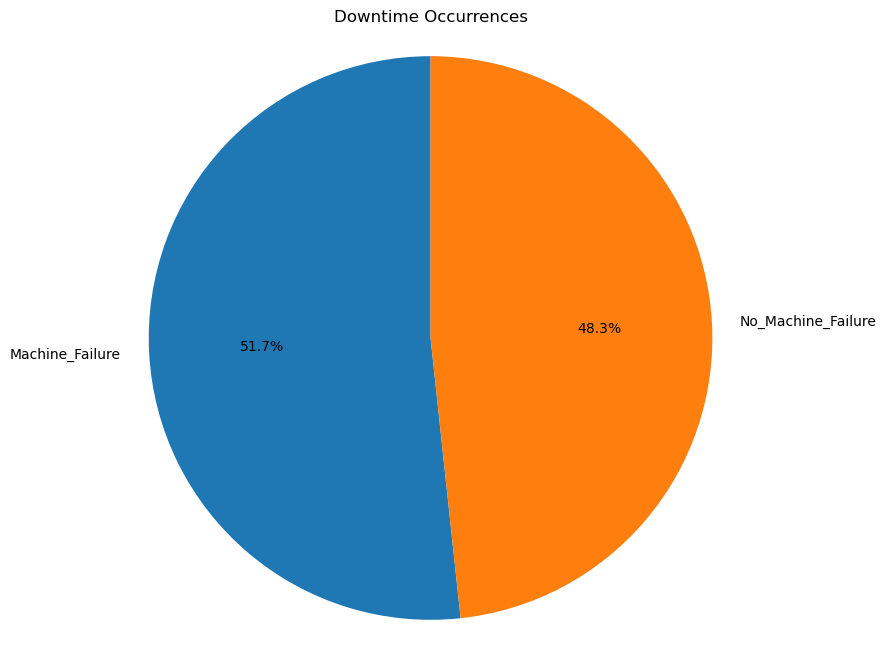

In [55]:
# Count the occurrences of Downtime
failure_counts = md['Downtime'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(failure_counts, labels=failure_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Downtime Occurrences')
plt.axis('equal')
plt.show()

In [56]:
Downtime_counts  = md[(md.Downtime =="Machine_Failure")]

In [57]:
Downtime_counts

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure,Coolant_Pressure,Air_System_Pressure,Coolant_Temperature,Hydraulic_Oil_Temperature,Spindle_Bearing_Temperature,Spindle_Vibration,Tool_Vibration,Spindle_Speed,Voltage,Torque,Cutting,Downtime
0,2021-12-31,Makino-L1-Unit1-2013,Shopfloor-L1,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892,335,24.055326,3.58,Machine_Failure
1,2021-12-31,Makino-L1-Unit1-2013,Shopfloor-L1,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856,368,14.202890,2.68,Machine_Failure
2,2021-12-31,Makino-L3-Unit1-2015,Shopfloor-L3,71.12,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851,325,24.049267,3.55,Machine_Failure
3,2022-05-31,Makino-L2-Unit1-2015,Shopfloor-L2,139.34,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461,360,25.860029,3.55,Machine_Failure
4,2022-03-31,Makino-L1-Unit1-2013,Shopfloor-L1,60.51,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526,354,25.515874,3.55,Machine_Failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2371,2022-02-01,Makino-L1-Unit1-2013,Shopfloor-L1,137.37,4.851332,6.336146,28.7,49.0,35.9,0.231,23.023,19573,307,15.900716,2.63,Machine_Failure
2372,2022-02-01,Makino-L1-Unit1-2013,Shopfloor-L1,55.54,4.841605,6.852283,26.4,42.9,36.2,1.436,24.819,26526,348,15.119739,2.53,Machine_Failure
2373,2022-02-01,Makino-L2-Unit1-2015,Shopfloor-L2,90.53,6.839413,5.698765,9.4,52.5,40.9,1.271,31.573,27613,377,16.964105,3.67,Machine_Failure
2374,2022-02-01,Makino-L1-Unit1-2013,Shopfloor-L1,137.37,4.842521,6.136585,21.5,49.6,42.3,0.432,37.423,19536,402,24.437039,2.84,Machine_Failure


In [59]:
mdc = Downtime_counts.groupby('Date')['Downtime'].count()

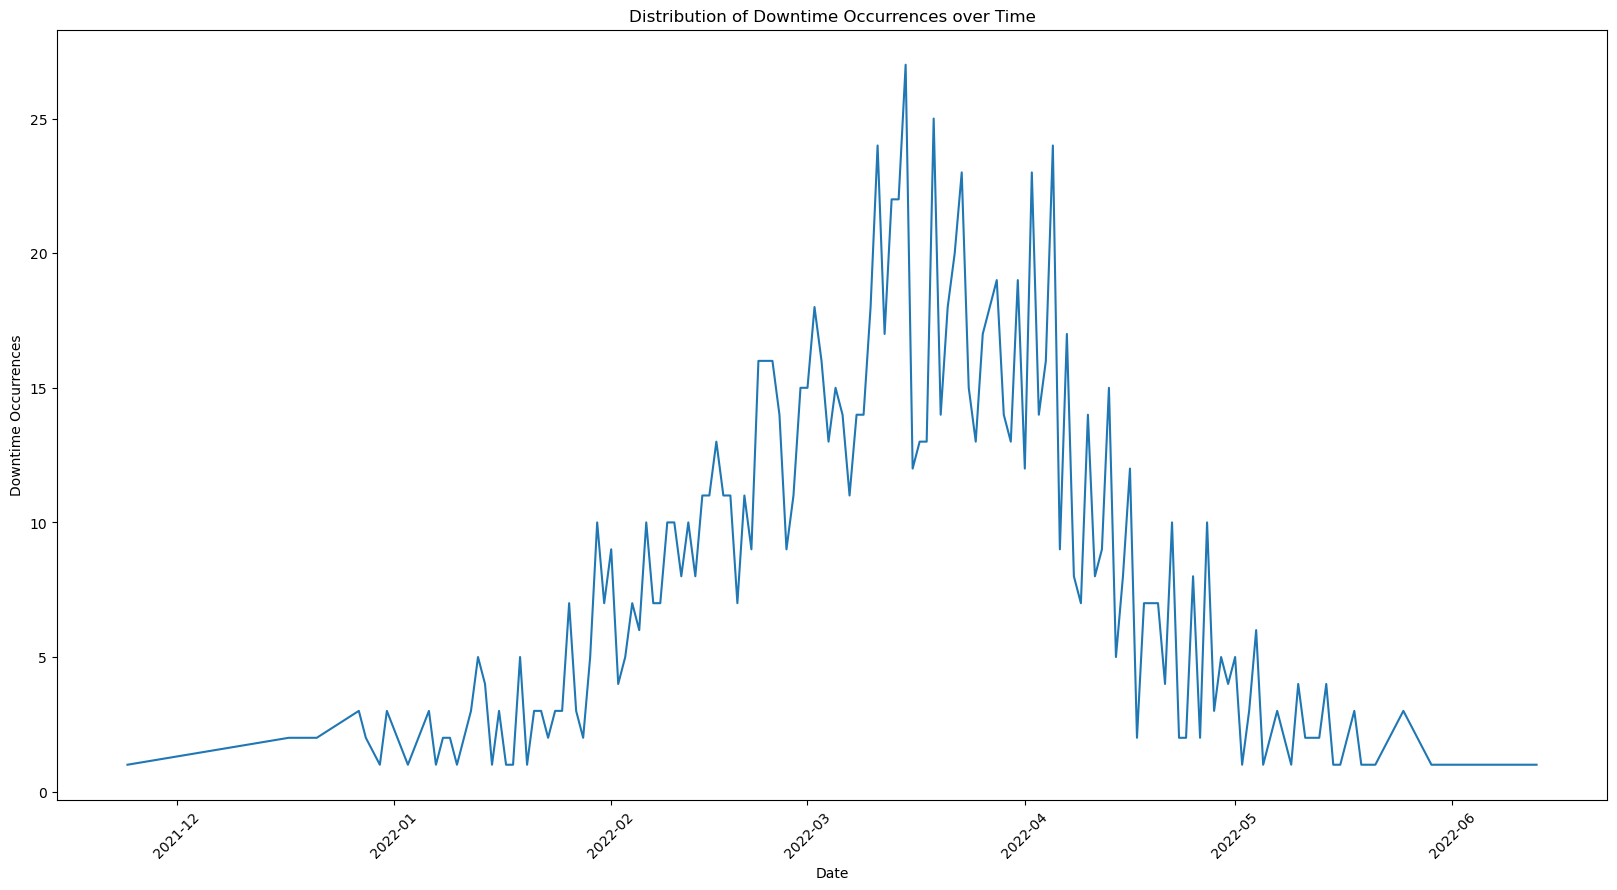

In [60]:
# Plot the distribution of Downtime occurrences over time
plt.figure(figsize=(20, 10))
plt.plot(mdc.index,mdc.values)
plt.xlabel('Date')
plt.ylabel('Downtime Occurrences')
plt.title('Distribution of Downtime Occurrences over Time')
plt.xticks(rotation=45)
plt.show()

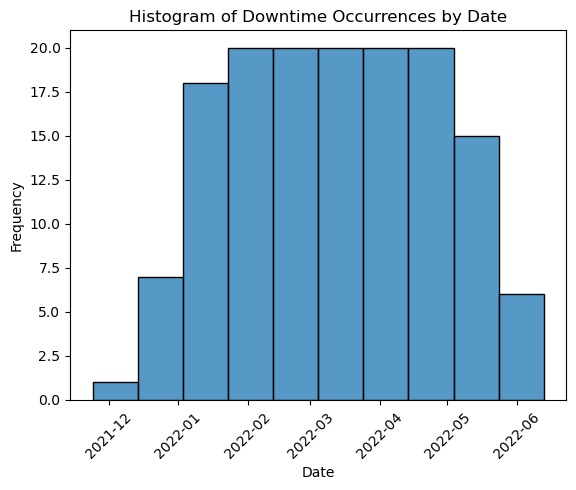

In [62]:
# Plot the histogram by date
sns.histplot(data=mdc, x='Date', bins=10)
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Histogram of Downtime Occurrences by Date')
plt.xticks(rotation=45)
plt.show()

In [65]:
mdc_mid = Downtime_counts.groupby('Machine_ID')['Downtime'].count()

In [66]:
mdc_mid

Machine_ID
Makino-L1-Unit1-2013    440
Makino-L2-Unit1-2015    382
Makino-L3-Unit1-2015    409
Name: Downtime, dtype: int64

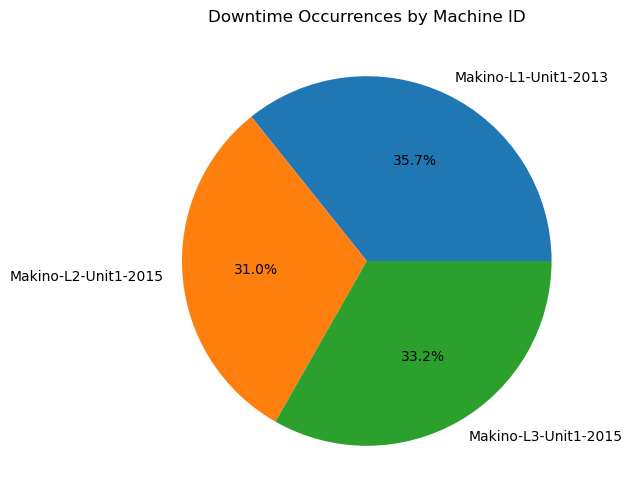

In [67]:
# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(mdc_mid, labels=mdc_mid.index, autopct='%1.1f%%')
plt.title('Downtime Occurrences by Machine ID')
plt.show()

In [68]:
mdc_malno = Downtime_counts.groupby('Assembly_Line_No')['Downtime'].count()

In [69]:
mdc_malno

Assembly_Line_No
Shopfloor-L1    440
Shopfloor-L2    382
Shopfloor-L3    409
Name: Downtime, dtype: int64

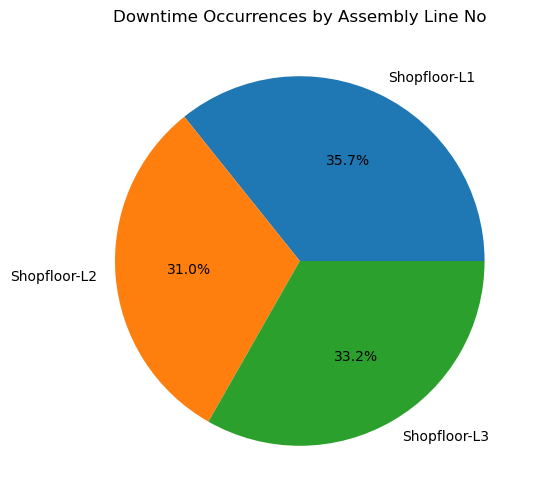

In [70]:
# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(mdc_malno, labels=mdc_malno.index, autopct='%1.1f%%')
plt.title('Downtime Occurrences by Assembly Line No')
plt.show()

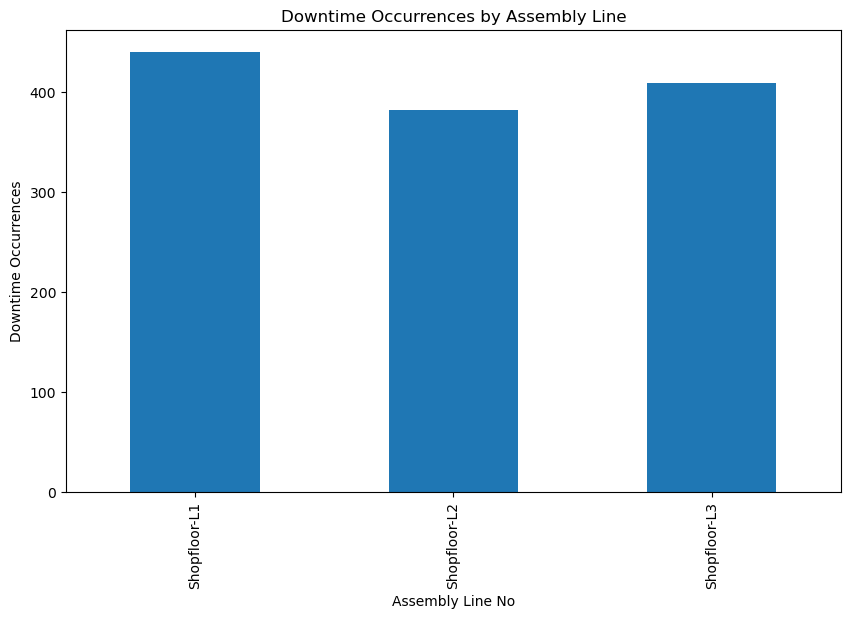

In [71]:
# Plot the downtime occurrences by assembly line
plt.figure(figsize=(10, 6))
mdc_malno.plot(kind='bar')
plt.xlabel('Assembly Line No')
plt.ylabel('Downtime Occurrences')
plt.title('Downtime Occurrences by Assembly Line')
plt.show()

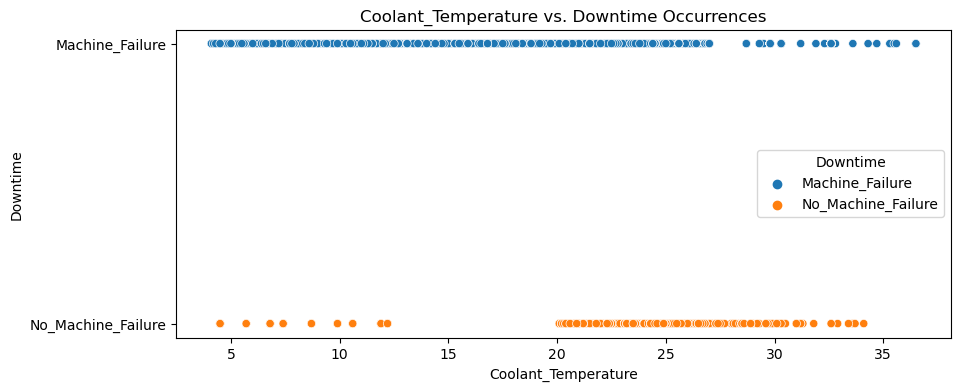

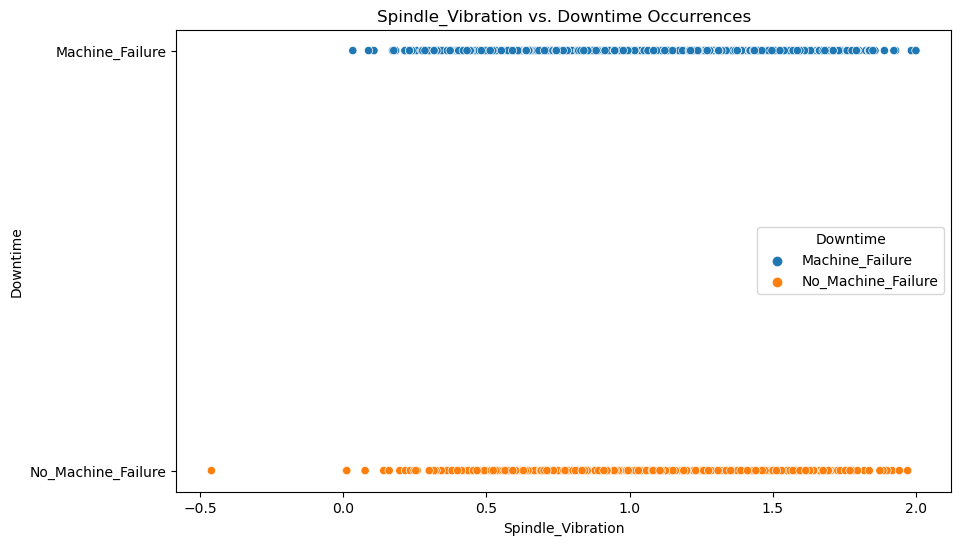

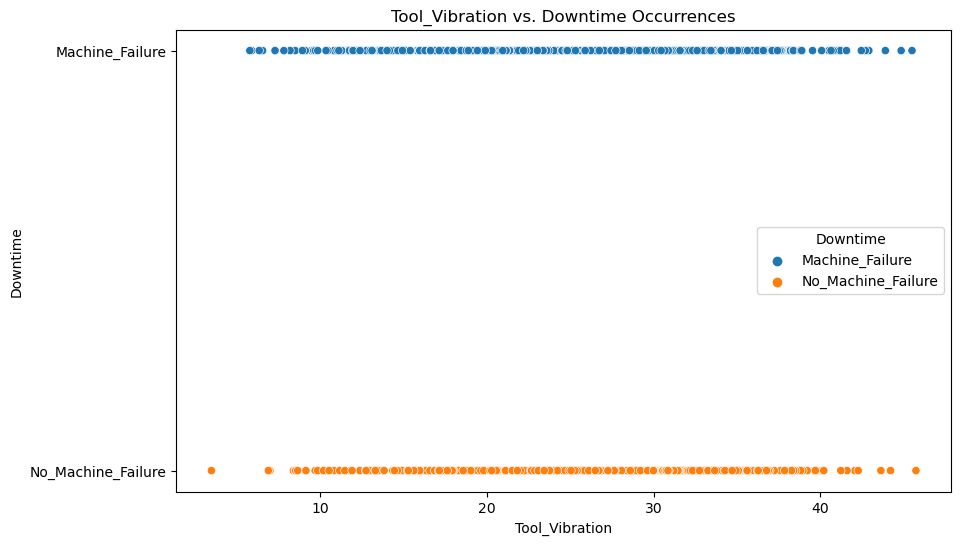

In [73]:
# Scatter plot of Coolant Temperature vs. Downtime Occurrences
plt.figure(figsize=(10,4))
sns.scatterplot(data=md, x='Coolant_Temperature', y='Downtime', hue='Downtime')
plt.xlabel('Coolant_Temperature')
plt.ylabel('Downtime')
plt.title('Coolant_Temperature vs. Downtime Occurrences')
plt.show()


# Scatter plot of Spindle Vibration vs. Downtime Occurrences
plt.figure(figsize=(10, 6))
sns.scatterplot(data=md, x='Spindle_Vibration', y='Downtime', hue='Downtime')
plt.xlabel('Spindle_Vibration')
plt.ylabel('Downtime')
plt.title('Spindle_Vibration vs. Downtime Occurrences')
plt.show()

# Scatter plot of tool vibration vs. Downtime Occurrences
plt.figure(figsize=(10, 6))
sns.scatterplot(data=md, x='Tool_Vibration', y='Downtime', hue='Downtime')
plt.xlabel('Tool_Vibration')
plt.ylabel('Downtime')
plt.title('Tool_Vibration vs. Downtime Occurrences')
plt.show()

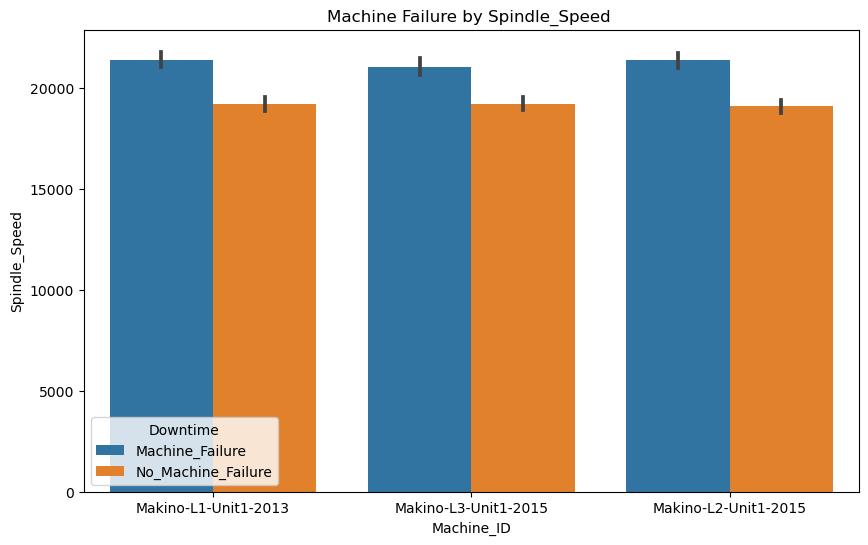

In [75]:
plt.figure(figsize=(10,6))
sns.barplot( x= 'Machine_ID', y  ='Spindle_Speed', data = md, hue ='Downtime')
plt.title("Machine Failure by Spindle_Speed ")
plt.show()